In [9]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [21]:
pd.set_option("display.max_rows", 100)

In [10]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [11]:
dfMain.columns.values


array(['mainid', 'mainworkgroup', 'maindeviceserial', 'maintransferdate',
       'androiddescription', 'geopoint_hh_ind', 'geopoint_hhlongitude',
       'geopoint_hhlatitude', 'geopoint_hhaltitude',
       'geopoint_hhaccuracy', 'regn', 'prov', 'mun', 'zone', 'brgy',
       'purok', 'street', 'hnum', 'hcn', 'int_date', 'start_time',
       'house_type', 'house_type_o', 'nbr', 'roof', 'wall', 'nofw',
       'nnucfam', 'hpregind', 'uniparind', 'disableind', 'phsize',
       'water', 'water_o', 'water_dist', 'toil', 'toil_o', 'tenur',
       'tenur_o', 'imprnt', 'welec', 'elec_company', 'elec_generator',
       'elec_solar', 'elec_battery', 'elec_source_o', 'elec_source_o_lb',
       'radio', 'radio_nwacq', 'tv', 'tv_nwacq', 'vplayer',
       'vplayer_nwacq', 'stereo', 'stereo_nwacq', 'karaoke',
       'karaoke_nwacq', 'ref', 'ref_nwacq', 'efan', 'efan_nwacq', 'iron',
       'iron_nwacq', 'stove', 'stove_nwacq', 'wmach', 'wmach_nwacq',
       'microw', 'microw_nwacq', 'computer', 'compute

In [13]:
dfMain = dfMain.filter(['mainid','brgy','roof','wall']);
# Filters the dataframe to show only the relevant columns for this scoring phase

dfMain

,mainid,brgy,roof,wall
0,1061066,186,4,4
1,555683,69,1,1
2,8611889,1,1,1
3,299398,165,4,4
4,136921,135,6,6
5,3842267,43,4,4
6,899855,201,1,1
7,235953,190,1,1
8,1591438,47,4,4
9,1053432,130,1,1


In [22]:
divisor = 1 / 6
print(divisor)

for i, row in dfMain.iterrows():
    roofScore = 0
    wallScore = 0
    if (row['roof'] == 1) :
        roofScore = divisor * 6
    elif (row['roof'] == 2) :
        roofScore = divisor * 4
    elif (row['roof'] == 3) :
        roofScore = divisor * 1
    elif (row['roof'] == 4) :
        roofScore = divisor * 5
    elif (row['roof'] == 5) :
        roofScore = divisor * 3
    elif (row['roof'] == 6) :
        roofScore = divisor * 2
        
    if (row['wall'] == 1) :
        wallScore = divisor * 6
    elif (row['wall'] == 2) :
        wallScore = divisor * 4
    elif (row['wall'] == 3) :
        wallScore = divisor * 1
    elif (row['wall'] == 4) :
        wallScore = divisor * 5
    elif (row['wall'] == 5) :
        wallScore = divisor * 3
    elif (row['wall'] == 6) :
        wallScore = divisor * 2
    
    dfMain.at[i,'finalScore'] = (roofScore + wallScore) / 2

dfMain

0.16666666666666666


,mainid,brgy,roof,wall,finalScore
0,1061066,186,4,4,0.833333
1,555683,69,1,1,1.000000
2,8611889,1,1,1,1.000000
3,299398,165,4,4,0.833333
4,136921,135,6,6,0.333333
5,3842267,43,4,4,0.833333
6,899855,201,1,1,1.000000
7,235953,190,1,1,1.000000
8,1591438,47,4,4,0.833333
9,1053432,130,1,1,1.000000


In [15]:
arrayBrgyScores = dfMain.groupby('brgy')['finalScore'].mean()

arrayBrgyScores

brgy
1      0.892857
2      0.996560
3      0.976190
4      0.992891
5      0.998645
6      0.999150
7      0.872093
8      0.883065
9      0.996914
10     0.868736
11     0.898219
12     0.686971
13     0.741337
14     0.905782
15     0.968099
16     0.825442
17     1.000000
18     0.991636
19     0.986301
20     0.986538
21     0.941214
22     0.966667
23     0.958561
24     0.884615
25     0.930000
26     0.895833
27     0.938272
28     0.889671
29     0.500000
30     0.757022
         ...   
172    0.910316
173    0.941300
174    0.986902
175    0.977427
176    0.666667
177    0.904440
178    0.880240
179    0.803760
180    0.937875
181    0.906055
182    0.967854
183    0.959516
184    0.819444
185    0.942428
186    0.784466
187    0.830596
188    0.898936
189    0.887876
190    0.897991
191    0.981481
192    0.955807
193    0.954260
194    0.889472
195    0.953380
196    0.855442
197    0.970721
198    0.964623
199    0.990236
200    0.926084
201    0.935643
Name: finalScore, L

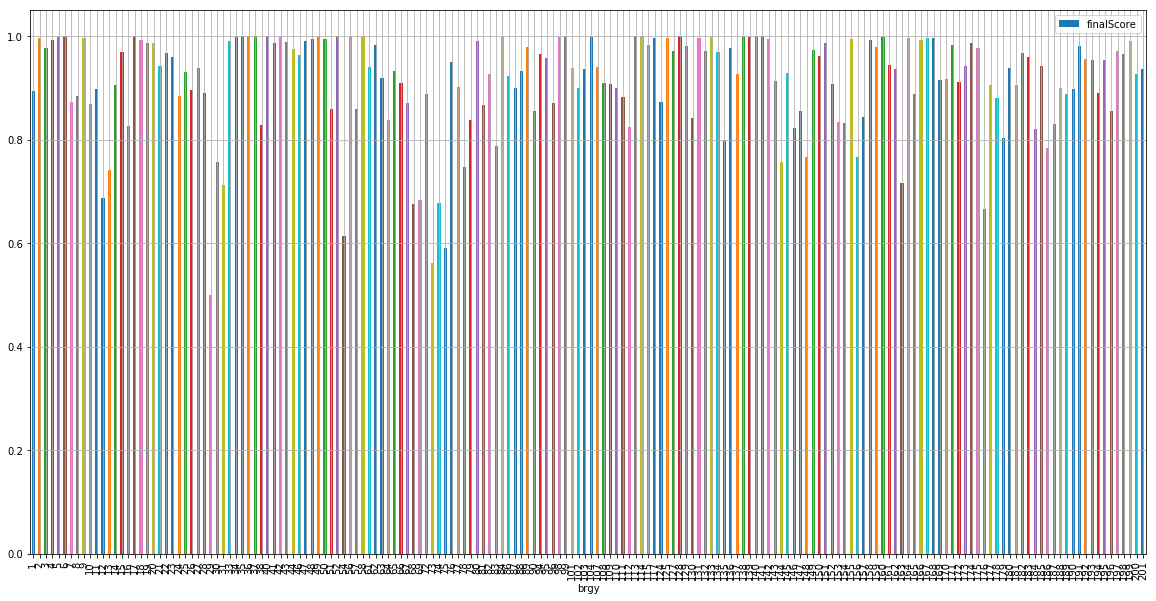

In [17]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()